# MA124 Maths by Computer: Assignment 1



Student number: u2100098
---


In [1]:
# Import standard libraries

import numpy as np
import matplotlib.pyplot as plt

---

## A. Taylor series approximations

One can approximate $\sin(x)$ using a finite number of terms of a Taylor series:

$$
\sin(x) \simeq \sum_{n=0}^N (-1)^n\frac{x^{2n+1}}{(2n+1)!} 
$$

One can also approximate the natural logarithm $\ln(1+x)$ using a finite number of terms of a Taylor series:

$$
\log(1+x) \simeq \sum_{n=1}^N (-1)^{n+1} \frac{x^n}{n}
$$

In this notebook we will explore these approximations, in particular how they depend on $N$. 





In [2]:
# Functions to compute Taylor series approximations for sine and logarithm
def my_sin(x,N):
    total = 0 * x
    for n in range(N+1):
        total += ((-1)**n * x**(2*n+1))/np.math.factorial(2*n+1)
    return total

def my_log(x,N):
    total = 0 * x
    for n in range(1,N+1):
        total += (-1)**(n+1) * x**n/n
    return total

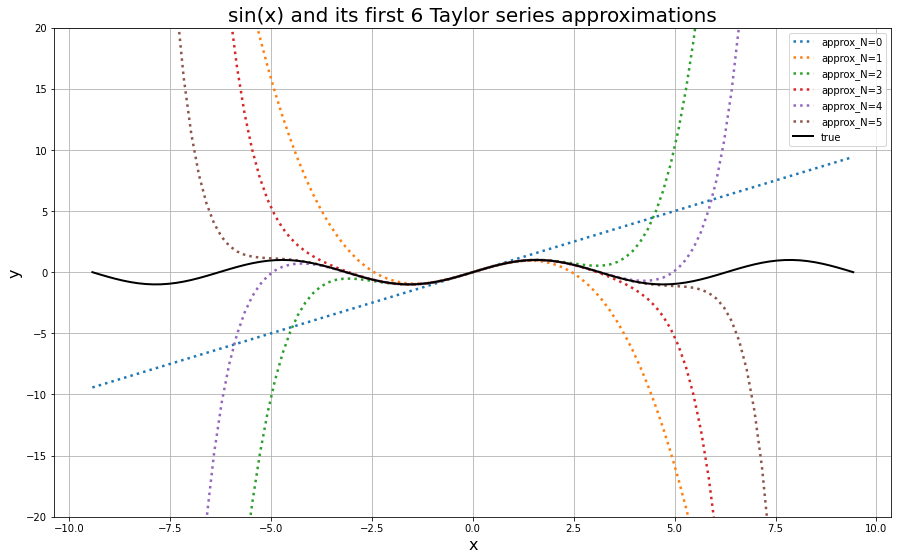

In [3]:
# Generate plots comparing exact and Taylor approximations for sine

# set N, there will be N+1 terms in the approximation
# and set the range of x
N = 6
x = np.linspace(-3*np.pi,3*np.pi,101)

# generate the exact sine function
y = np.sin(x)

# set the figure size
plt.figure(figsize=(15,9))

# plot the approximated results
for i in range(N):
    # calling the my_sin function
    sin_approx = my_sin(x,i)
    plt.plot(x,sin_approx, linewidth=2.5,linestyle=':' ,label="approx_N="+str(i))

# plot the true sine function
plt.plot(x,y,color='black', label='true', linewidth = 2,linestyle='-')

# restrict the range to make the graphs more clear and informative
plt.ylim(-20,20)

# formating the graphs to be more pretty
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend(fontsize=10)
plt.title('sin(x) and its first 6 Taylor series approximations', fontsize=20)
plt.grid(True)
plt.show()

The figure above shows the graph of y = sin(x) and then the Taylor series approximations for the first 1 to 6 terms.

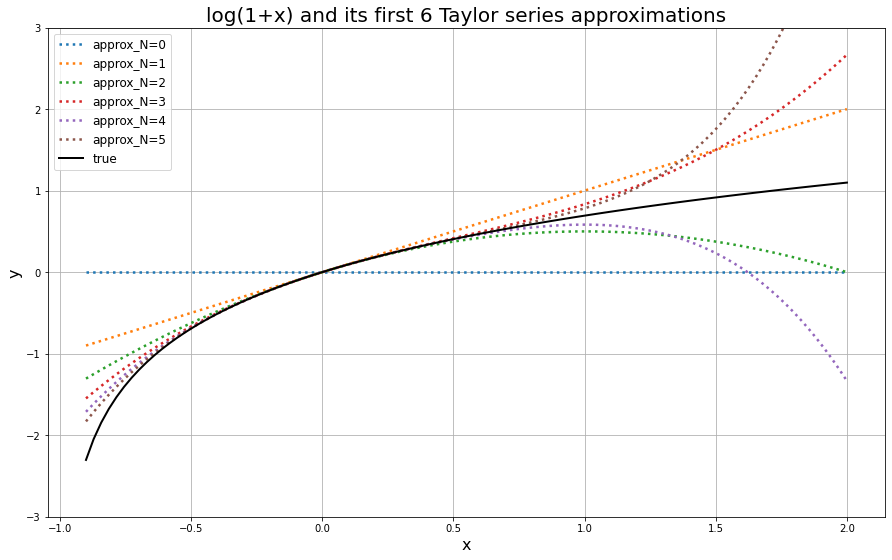

In [4]:
# Generate plots comparing exact and Taylor approximations for the natural logarithm

# set N, there will be N terms in the approximation
# and set the range of x
N = 6
x = np.linspace(-0.9,2,101)

# generate the exact logarithm
y = np.log(1+x)

# set the figure size
plt.figure(figsize=(15,9))

# plot the approximated results
for i in range(N):
    # calling the my_log function
    log_approx = my_log(x,i)
    plt.plot(x,log_approx, linestyle=':', linewidth=2.5, label="approx_N="+str(i))

# plot the true log function
plt.plot(x,y, label='true', linewidth=2,color='black',linestyle='-')

# restrict the range to make the graphs more clear and informative
plt.ylim(-3,3)

# formating the graphs to be more pretty
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('log(1+x) and its first 6 Taylor series approximations', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

The figure above shows the graph of y = log(1+x) and then the Taylor series approximations for the first 1 to 6 terms.

---

### Error plots (Challenge section)

---


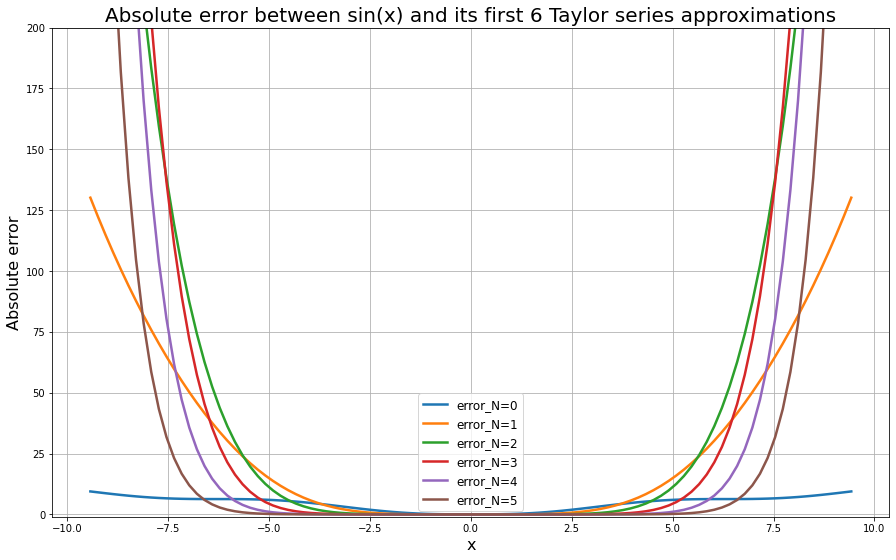

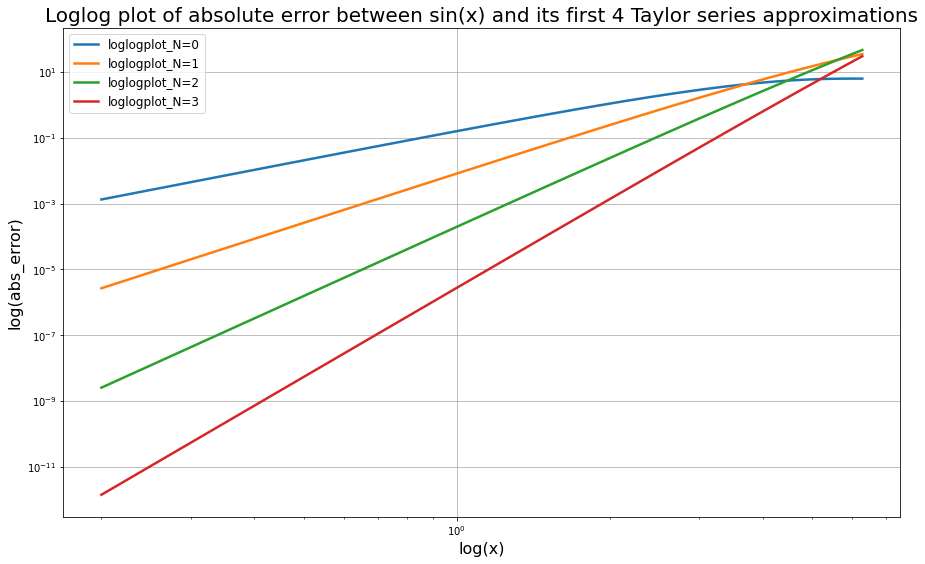

In [5]:
N = 6
x = np.linspace(-3*np.pi,3*np.pi,101)

# set the figure size
plt.figure(figsize=(15,9))

# calculate the absolute error and plot the graph for the 6 Taylor series
for i in range(N):
    abs_error = abs(np.sin(x)- my_sin(x,i))
    plt.plot(x,abs_error, linewidth=2.5,linestyle='-' ,label="error_N="+str(i))

# restrict the range to make the graphs more clear and informative
plt.ylim(-1,200)

# formating the graphs to be more pretty
plt.xlabel('x', fontsize=16)
plt.ylabel('Absolute error', fontsize=16)
plt.title('Absolute error between sin(x) and its first 6 Taylor series approximations', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

N=3
x = np.linspace(0.2,2*np.pi,101)

# set the figure size
plt.figure(figsize=(15,9))

for i in range(N+1):
    abs_error = abs(np.sin(x)- my_sin(x,i))
    plt.loglog(x,abs_error,linewidth=2.5,linestyle='-' ,label="loglogplot_N="+str(i))

plt.xlabel('log(x)', fontsize=16)
plt.ylabel('log(abs_error)', fontsize=16)
plt.title('Loglog plot of absolute error between sin(x) and its first 4 Taylor series approximations', fontsize=20)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

The figures above show the graph of absolute error between the sin(x) and the first 6 Taylor series approximations, and the graph of the log-log plot of the absolute error between the sin(x) and the first 6 Taylor series approximations.

Interpretations:

Absolute error graph:
As |x| increases, the absolute error between sin(x) and the approximation increases for all of the Taylor approximations. However, the greater the value of N, the more accurate the approximation, so the absolute error increases at a slower rate.

Log-log plot: 
When you plot a log-log graph, monomials appear as straight lines: 
$$y=ax^k \implies \log(y)=\log(a)+k\log(x)$$
where log(a) represents the y-intercept and k represents the gradient. When N increases, the log-log graph becomes more linear, hence the absolute error function becomes more and more similar to a monomial curve. This means that the difference between the Taylor series approximation and the true sine function is becoming less and less complex, i.e. the approximation is getting better.

---
## B. Parametric roller coaster
---
Here we present an original design for a parametric roller coaster. The equations for the 6 sections of the rollercoaster are as follows:

$$x_1(t)=2t\sin(2t), y_1(t)=2t\cos(2t), z_1(t)=5t, t \in[0,10\pi]$$

$$x_2(t)=0,y_2(t)=t+10\pi,z_2(t)=10\cos(\frac{t}{10})+10+50\pi,t\in[10\pi,50\pi]$$

$$x_3(t)=0,y_3(t)=(150-30\pi)\cos(\frac{\pi(t+300-110\pi)}{300-60\pi})+150+30\pi,z_3(t)=-(150-30\pi)\sin(\frac{\pi(t+300-110\pi)}{300-60\pi})+50\pi,t\in[50\pi,300-10\pi]$$

$$x_4(t)=t-300+10\pi,y_4(t)=300,z_4(t)=\frac{(t-300+10\pi)^2}{500}+50\pi,t\in[300-10\pi,500-10\pi]$$

$$x_5(t)=200,y_5(t)=300(1-t+500-10\pi),z_5(t)=(80+50\pi)(1-t+500-10\pi),t\in[500-10\pi,501-10\pi]$$ 

$$x_6(t)=100\cos(t-501+10\pi)+100,y_6(t)=0,z_6(t)=50\sin(t-501+10\pi),t\in[501-10\pi,501-9\pi]$$

The helix begins at:( 0.0 , 0.0 , 0 ) and ends at ( -1.538936554977432e-13 , 62.83185307179586 , 157.07963267948966 ).
The cosine curve begins at:( 0.0 , 62.83185307179586 , 157.07963267948966 ) and ends at ( 0.0 , 188.4955592153876 , 157.07963267948966 ).
The semicircle begins at:( 0.0 , 188.49555921538757 , 157.07963267948966 ) and ends at ( 0.0 , 300.0 , 157.07963267948978 ).
The parabola begins at: -7.105427357601002e-15 , 300.0 , 157.07963267948966 ) and ends at ( 200.0 , 300.0 , 237.07963267948966 ).
The straight line begins at: ( 200.0 , 300.00000000000216 , 237.07963267949134 ) and ends at ( 200.0 , 2.1316282072803006e-12 , 1.6845521079708424e-12 ).
The ellipse begins at: ( 200.0 , 0.0 , -3.552713678800501e-13 ) and ends at ( 0.0 , 0.0 , 8.94301653695862e-13 ).



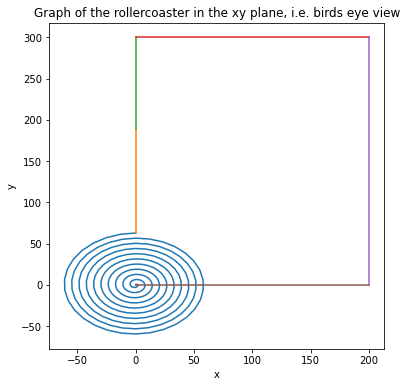

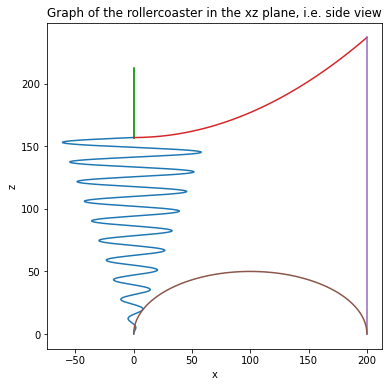

In [ ]:
#Section 1: Helix
t1 = np.linspace(0,10*np.pi,301)
x1 = 2*t1*np.sin(2*t1)
y1 = 2*t1*np.cos(2*t1)
z1 = 5*t1

#Section 2: Cosine
t2 = np.linspace(10*np.pi,50*np.pi,101)
x2 = 0+0*t2
y2 = t2+10*np.pi
z2 = 10*np.cos(t2/10)+10+50*np.pi

#Section 3: Semicircle
t3 = np.linspace(50*np.pi,300-10*np.pi,101)
x3 = 0+0*t3
y3 = (150-30*np.pi)*np.cos(np.pi*(t3+300-110*np.pi)/(300-60*np.pi))+150+30*np.pi
z3 = -1*(150-30*np.pi)*np.sin(np.pi*(t3+300-110*np.pi)/(300-60*np.pi))+50*np.pi

#Section 4: Parabola
t4 = np.linspace(300-10*np.pi,500-10*np.pi,101)
x4 = t4-300+10*np.pi
y4 = 300+0*t4
z4 = (t4-300+10*np.pi)**2/500 +50*np.pi

#Section 5: Straight line
t5 = np.linspace(500-10*np.pi,501-10*np.pi,101)
x5 = 200+0*t5
y5 = 300*(1-t5+500-10*np.pi)
z5 = (80+50*np.pi)*(1-t5+500-10*np.pi)

#Section 6: Ellipse
t6 = np.linspace(501-10*np.pi,501-9*np.pi,101)
x6 = 100*np.cos(t6-501+10*np.pi)+100
y6 = 0+0*t6
z6 = 50*np.sin(t6-501+10*np.pi)

#Printing where each section begins and ends to show the curve is closed
print('The helix begins at:(',2*0*np.sin(2*0),',',2*0*np.cos(2*0),',',5*0,') and ends at (',2*10*np.pi*np.sin(2*10*np.pi),',',2*10*np.pi*np.cos(2*10*np.pi),',',5*10*np.pi,').')
print('The cosine curve begins at:(', 0+0*10*np.pi,',',10*np.pi+10*np.pi,',',10*np.cos(10*np.pi/10)+10+50*np.pi, ') and ends at (',0+0*50*np.pi,',',50*np.pi+10*np.pi,',',10*np.cos(50*np.pi/10)+10+50*np.pi,').')
print('The semicircle begins at:(',0+0*50*np.pi,',',(150-30*np.pi)*np.cos(np.pi*(50*np.pi+300-110*np.pi)/(300-60*np.pi))+150+30*np.pi,',',-1*(150-30*np.pi)*np.sin(np.pi*(50*np.pi+300-110*np.pi)/(300-60*np.pi))+50*np.pi, ') and ends at (',0+0*(300-10*np.pi),',',(150-30*np.pi)*np.cos(np.pi*((300-10*np.pi)+300-110*np.pi)/(300-60*np.pi))+150+30*np.pi,',',-1*(150-30*np.pi)*np.sin(np.pi*((300-10*np.pi)+300-110*np.pi)/(300-60*np.pi))+50*np.pi,').')
print('The parabola begins at:',(300-10*np.pi)-300+10*np.pi,',',300+0*(300-10*np.pi),',',((300-10*np.pi)-300+10*np.pi)**2/500 +50*np.pi,') and ends at (',(500-10*np.pi)-300+10*np.pi,',',300+0*(500-10*np.pi),',',((500-10*np.pi)-300+10*np.pi)**2/500 +50*np.pi,').')
print('The straight line begins at: (',200+0*(500-10*np.pi),',',300*(1-(500-10*np.pi)+500-10*np.pi),',',(80+50*np.pi)*(1-(500-10*np.pi)+500-10*np.pi),') and ends at (',200+0*(501-10*np.pi),',',300*(1-(501-10*np.pi)+500-10*np.pi),',',(80+50*np.pi)*(1-(501-10*np.pi)+500-10*np.pi),').')
print('The ellipse begins at: (',100*np.cos((501-10*np.pi)-501+10*np.pi)+100,',',0+0*(501-10*np.pi),',',50*np.sin((501-10*np.pi)-501+10*np.pi),') and ends at (',100*np.cos((501-9*np.pi)-501+10*np.pi)+100,',',0+0*(501-9*np.pi),',',50*np.sin((501-9*np.pi)-501+10*np.pi),').')
print('')

#Plotting the graphs in the xy, xz and yz planes respectively
plt.figure(figsize=(6,6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.xlabel('x',)
plt.ylabel('y')
plt.title('Graph of the rollercoaster in the xy plane, i.e. birds eye view')
plt.show()

plt.figure(figsize=(6,6))
plt.plot(x1,z1)
plt.plot(x2,z2)
plt.plot(x3,z3)
plt.plot(x4,z4)
plt.plot(x5,z5)
plt.plot(x6,z6)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Graph of the rollercoaster in the xz plane, i.e. side view')
plt.show()

plt.figure(figsize=(6,6))
plt.plot(y1,z1)
plt.plot(y2,z2)
plt.plot(y3,z3)
plt.plot(y4,z4)
plt.plot(y5,z5)
plt.plot(y6,z6)
plt.xlabel('y')
plt.ylabel('z')
plt.title('Graph of the rollercoaster in the yz plane, i.e. side view')
plt.show()
